In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 96% 49.0M/50.9M [00:03<00:00, 19.2MB/s]
100% 50.9M/50.9M [00:03<00:00, 14.9MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [6]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [7]:
raw_data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [ ]:
raw_data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [ ]:
raw_data.isnull().sum()

,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0
Flotation Column 03 Air Flow,0


In [9]:
raw_data.nunique()

,0
% Iron Feed,278
% Silica Feed,293
Starch Flow,409317
Amina Flow,319416
Ore Pulp Flow,180189
Ore Pulp pH,131143
Ore Pulp Density,105805
Flotation Column 01 Air Flow,43675
Flotation Column 02 Air Flow,80442
Flotation Column 03 Air Flow,40630


In [22]:
(raw_data != raw_data.shift()).sum()

,0
% Iron Feed,307
% Silica Feed,306
Starch Flow,729203
Amina Flow,727488
Ore Pulp Flow,732400
Ore Pulp pH,713041
Ore Pulp Density,715814
Flotation Column 01 Air Flow,698973
Flotation Column 02 Air Flow,730617
Flotation Column 03 Air Flow,708892


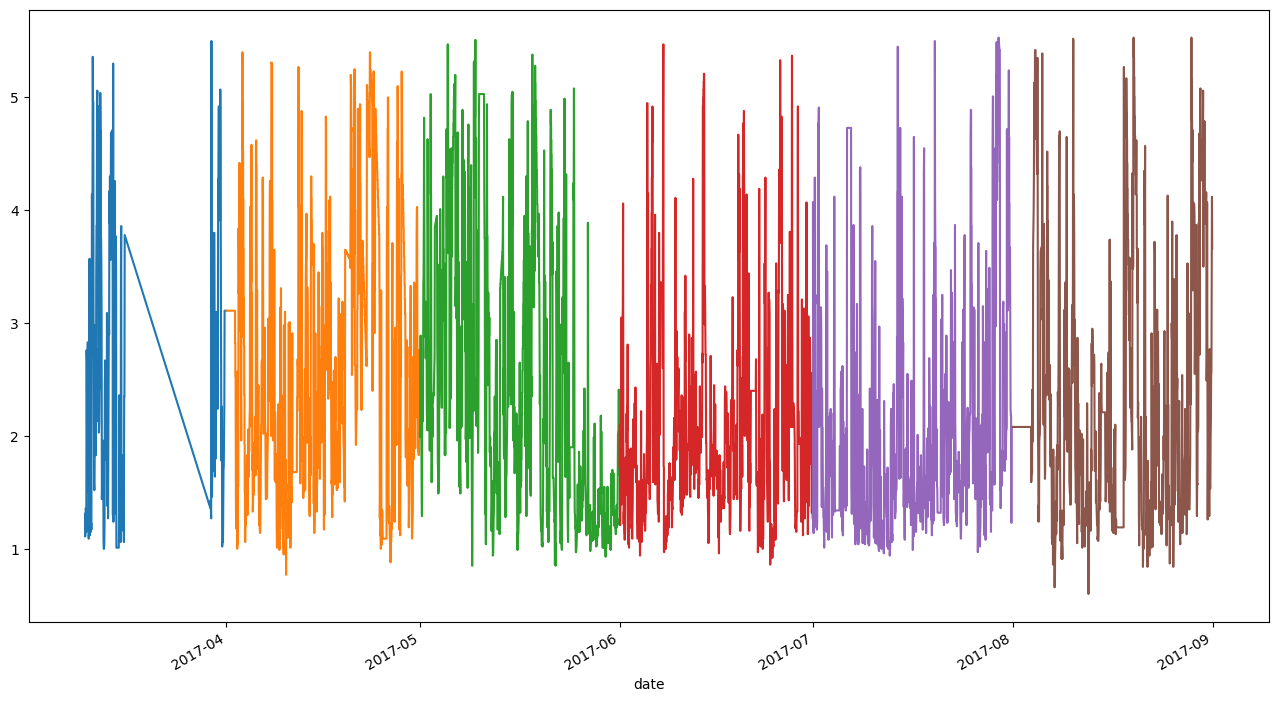

In [ ]:
for month in range(3,9):
  raw_data['% Silica Concentrate'].loc[raw_data.index.month == month].plot(figsize= (16,9))

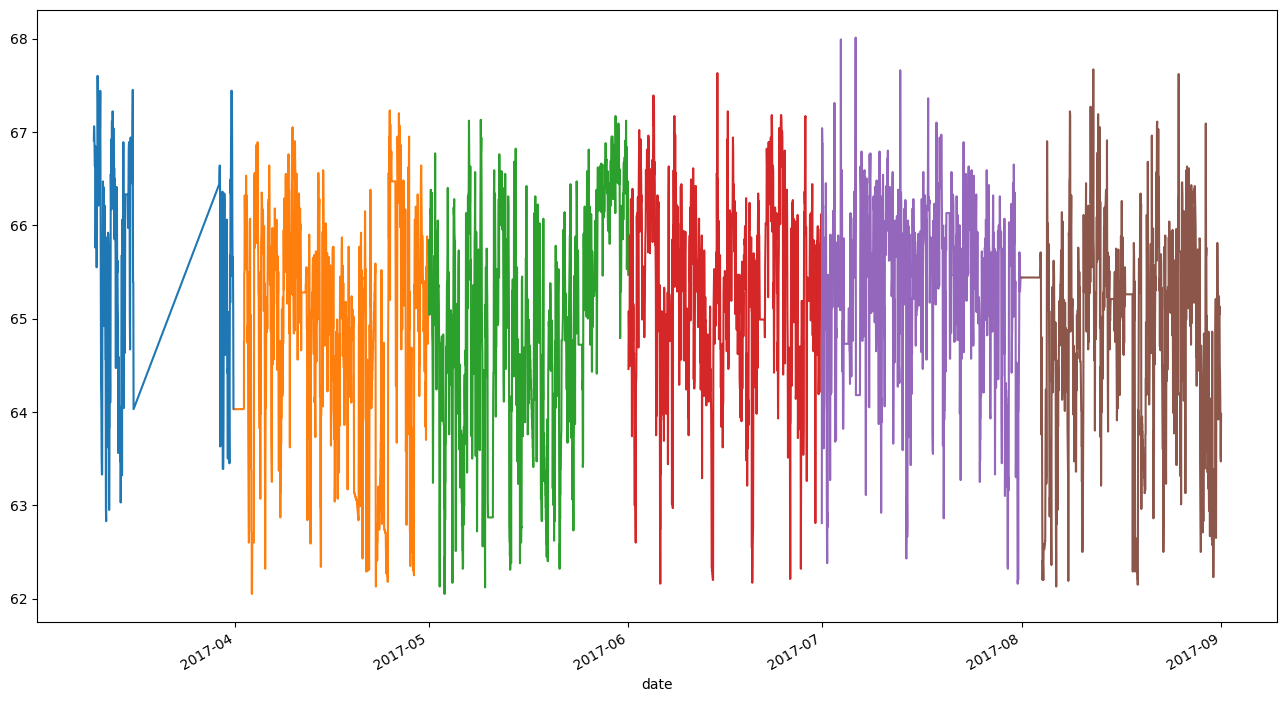

In [23]:
for month in range(3,9):
  raw_data['% Iron Concentrate'].loc[raw_data.index.month == month].plot(figsize= (16,9))

In [ ]:
def consecutive(vector, k=2):
    n = len(vector)
    result = np.zeros(n, dtype=bool)

    for i in range(k-1, n):
        if all(vector[i-k+1:i+1] == vector[i]):
            result[i-k+1:i+1] = True

    return result

In [ ]:
temp_df_1d = raw_data.loc['2017-03-10']
temp_df_1d.shape

(4134, 23)

In [ ]:
temp_df_1h = temp_df_1d.loc[temp_df_1d.index.hour == 4]
print(temp_df_1h.shape[0],3600/temp_df_1h.shape[0])

180 20.0


In [ ]:
filter = consecutive(raw_data['% Silica Concentrate'],181)
filter


<ipython-input-14-20c579bcdd35>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all(vector[i-k+1:i+1] == vector[i]):


array([False, False, False, ..., False, False, False])

In [ ]:
filter.shape

(737453,)

In [ ]:
filter = filter*1
filter

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
filter.mean()

0.13741757101808522

In [8]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.530,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 02:00:00,55.2,16.98,3170.410,539.673,399.697,10.15890,1.66910,249.291,248.269,248.313,...,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,67.06,1.11
2017-03-10 03:00:00,55.2,16.98,3365.650,573.517,399.023,10.08600,1.70565,249.379,253.312,252.092,...,249.060,456.445,440.432,456.625,432.736,464.334,445.950,432.906,66.97,1.27
2017-03-10 04:00:00,55.2,16.98,2693.750,592.133,409.204,9.94880,1.72472,248.302,251.906,251.115,...,249.236,459.248,480.114,453.814,433.885,438.642,421.974,408.193,66.75,1.36
2017-03-10 05:00:00,55.2,16.98,2352.216,601.807,398.145,9.84375,1.75928,248.950,246.313,248.071,...,252.686,558.545,548.280,551.960,561.720,543.070,529.260,514.240,66.63,1.34


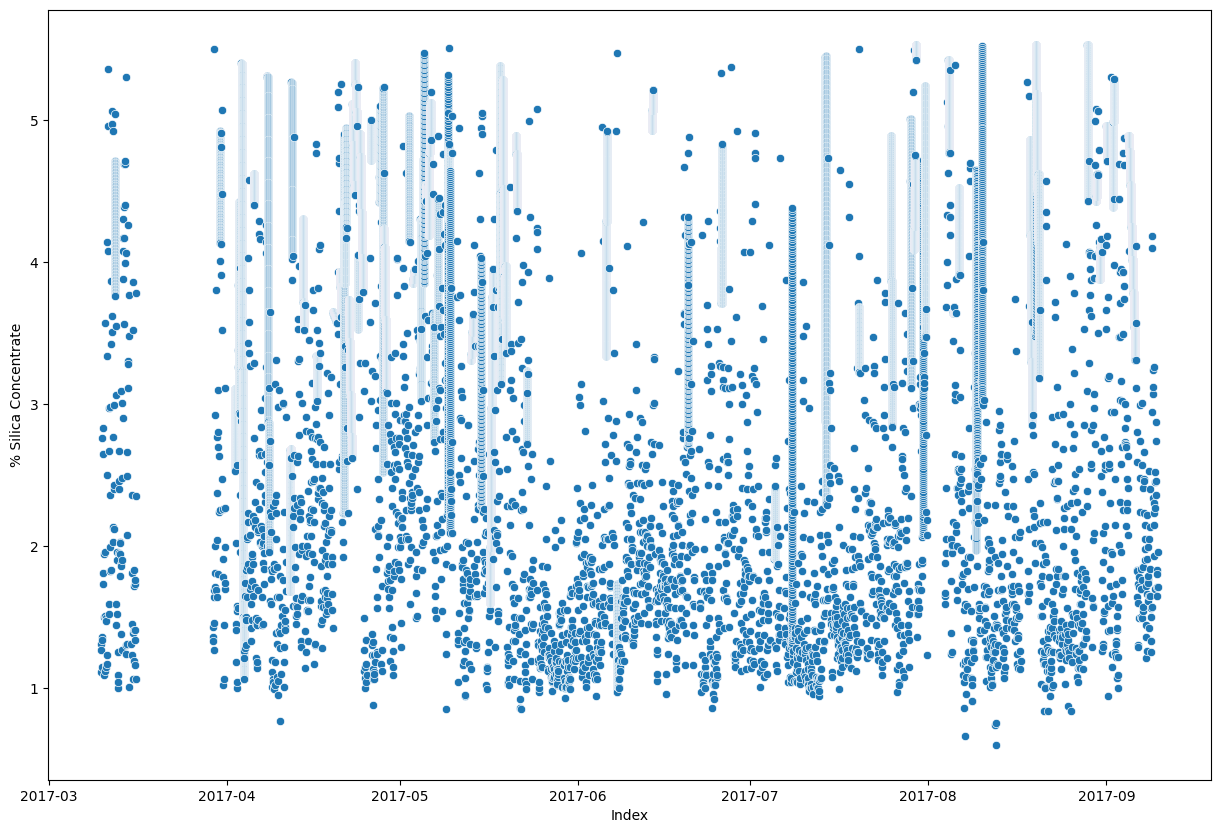

In [ ]:
# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x=df.index, y='% Silica Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

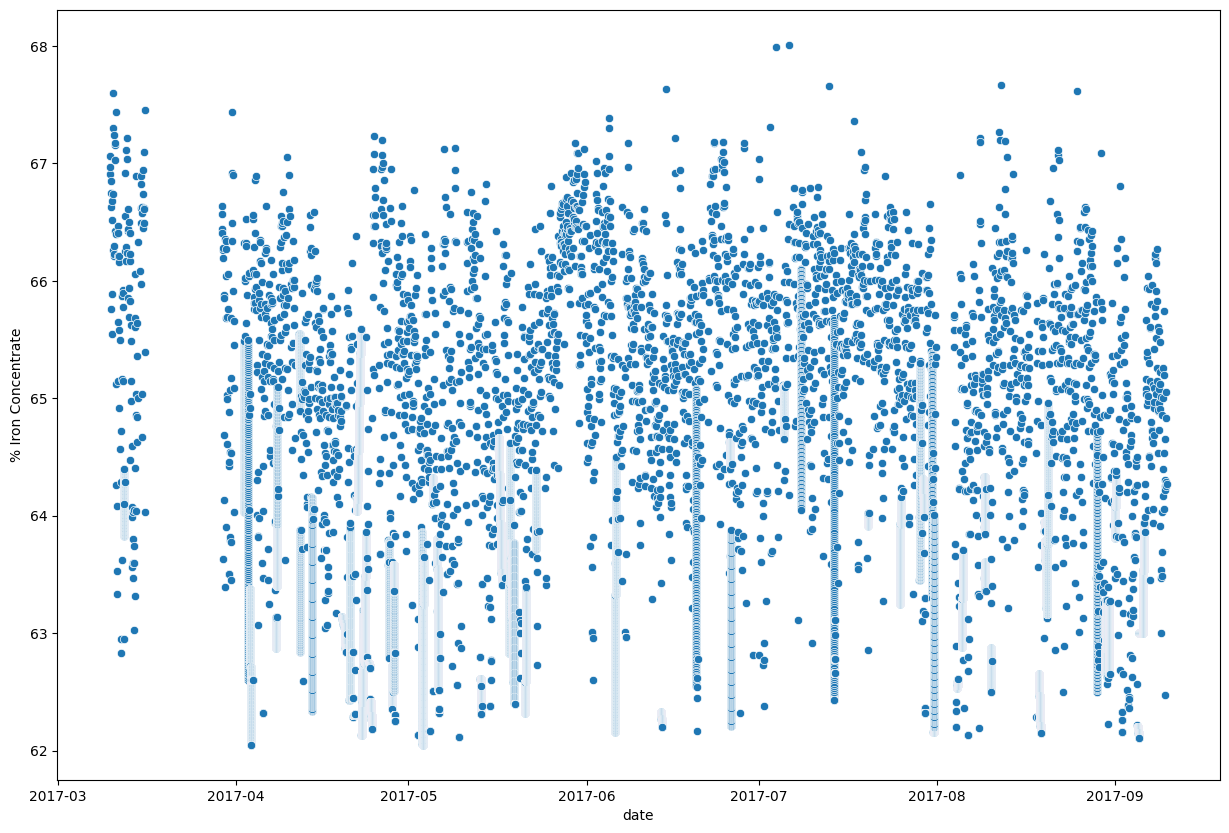

In [10]:
# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x=df.index, y='% Iron Concentrate')

plt.ylabel('% Iron Concentrate')
plt.show()

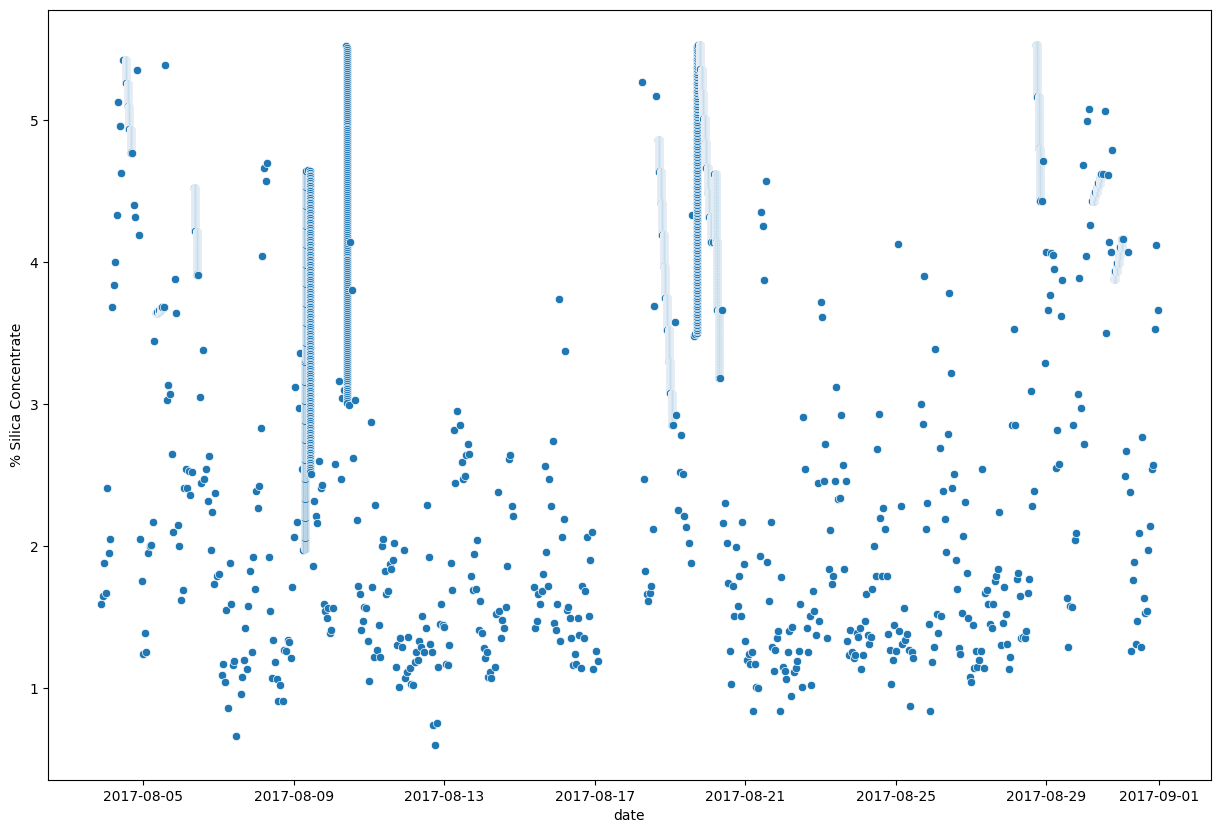

In [11]:
dfmes8= df.loc[(df.index.month == 8)]

# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=dfmes8, x=dfmes8.index, y='% Silica Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

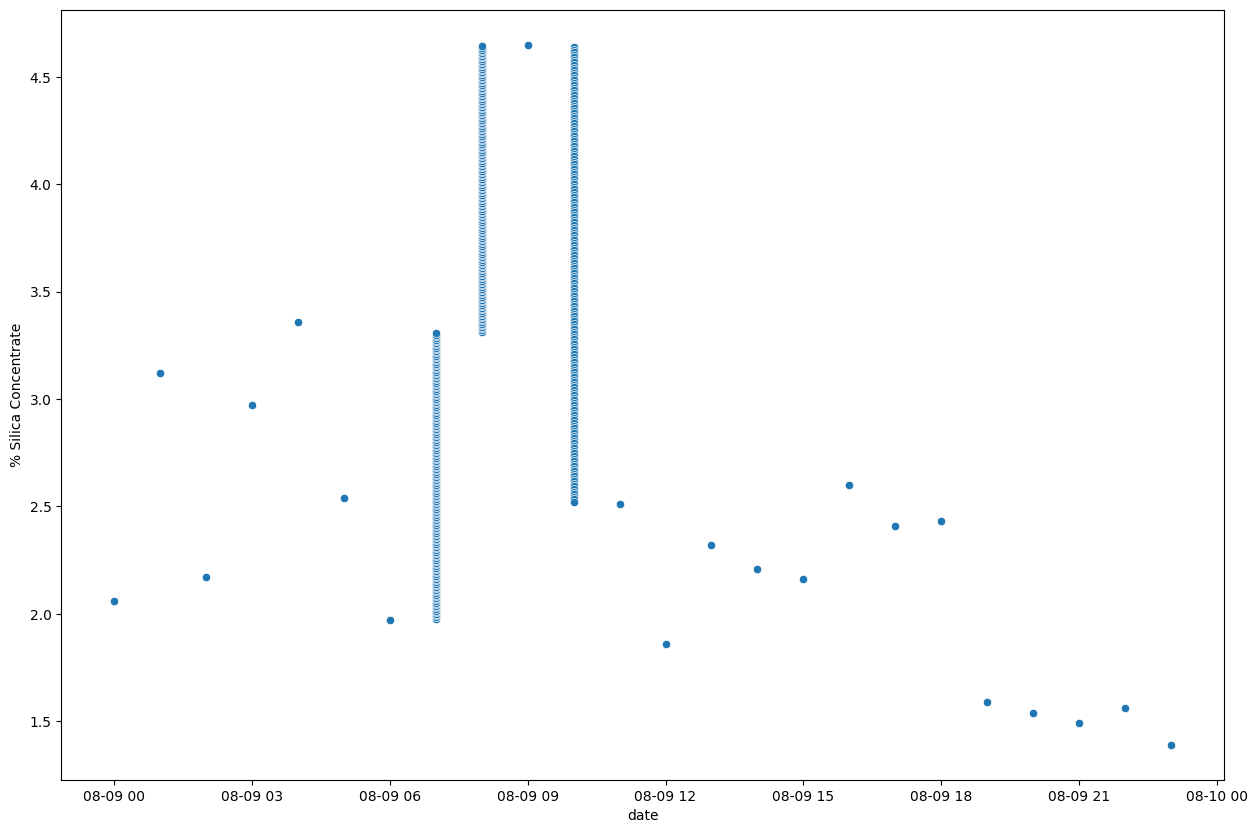

In [16]:
dfmes8dia9= dfmes8.loc[(dfmes8.index.day == 9)]

# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=dfmes8dia9, x=dfmes8dia9.index, y='% Silica Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

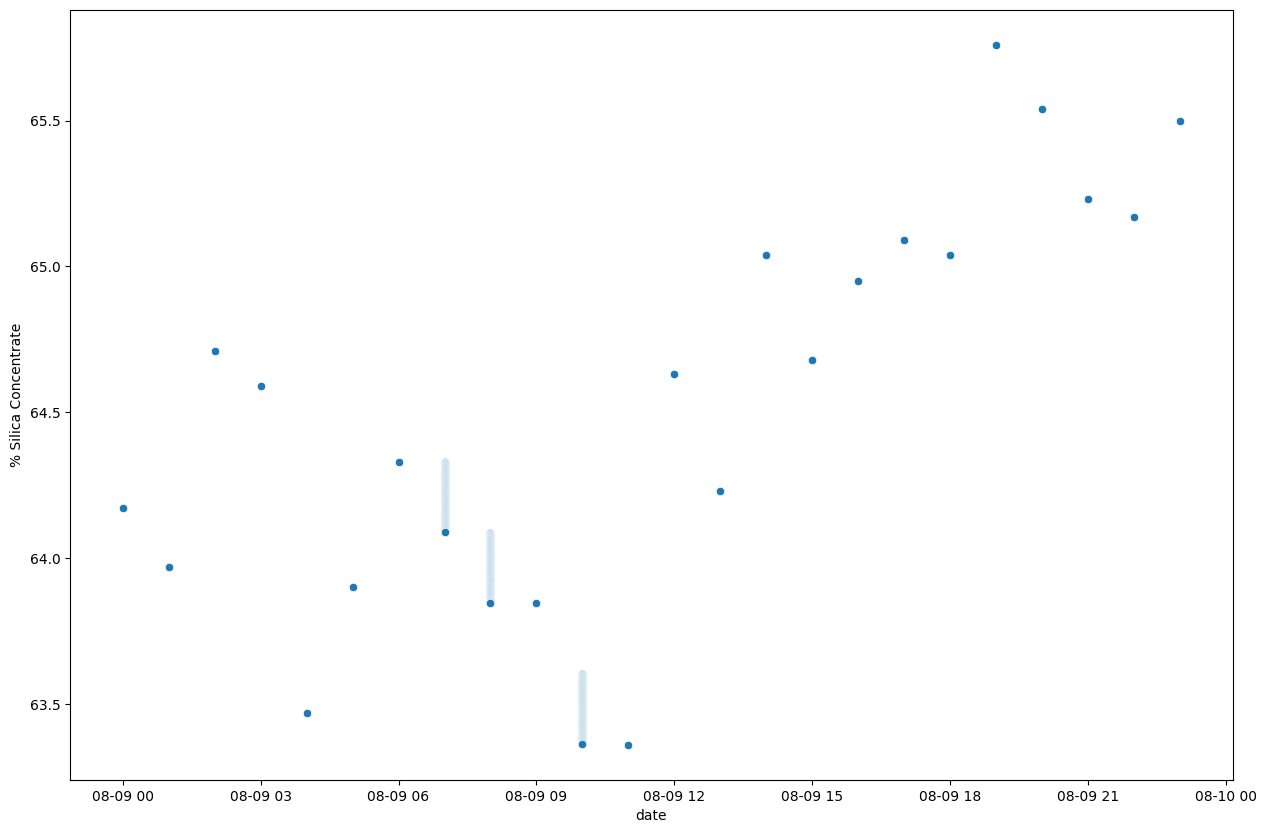

In [17]:
dfmes8dia9= dfmes8.loc[(dfmes8.index.day == 9)]

# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=dfmes8dia9, x=dfmes8dia9.index, y='% Iron Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

In [ ]:
df89_resampled = dfmes8dia9.resample('H').last().round(2)
df89_resampled['% Silica Concentrate']

,% Silica Concentrate
date,
2017-08-09 00:00:00,2.06
2017-08-09 01:00:00,3.12
2017-08-09 02:00:00,2.17
2017-08-09 03:00:00,2.97
2017-08-09 04:00:00,3.36
2017-08-09 05:00:00,2.54
2017-08-09 06:00:00,1.97
2017-08-09 07:00:00,3.31
2017-08-09 08:00:00,4.64


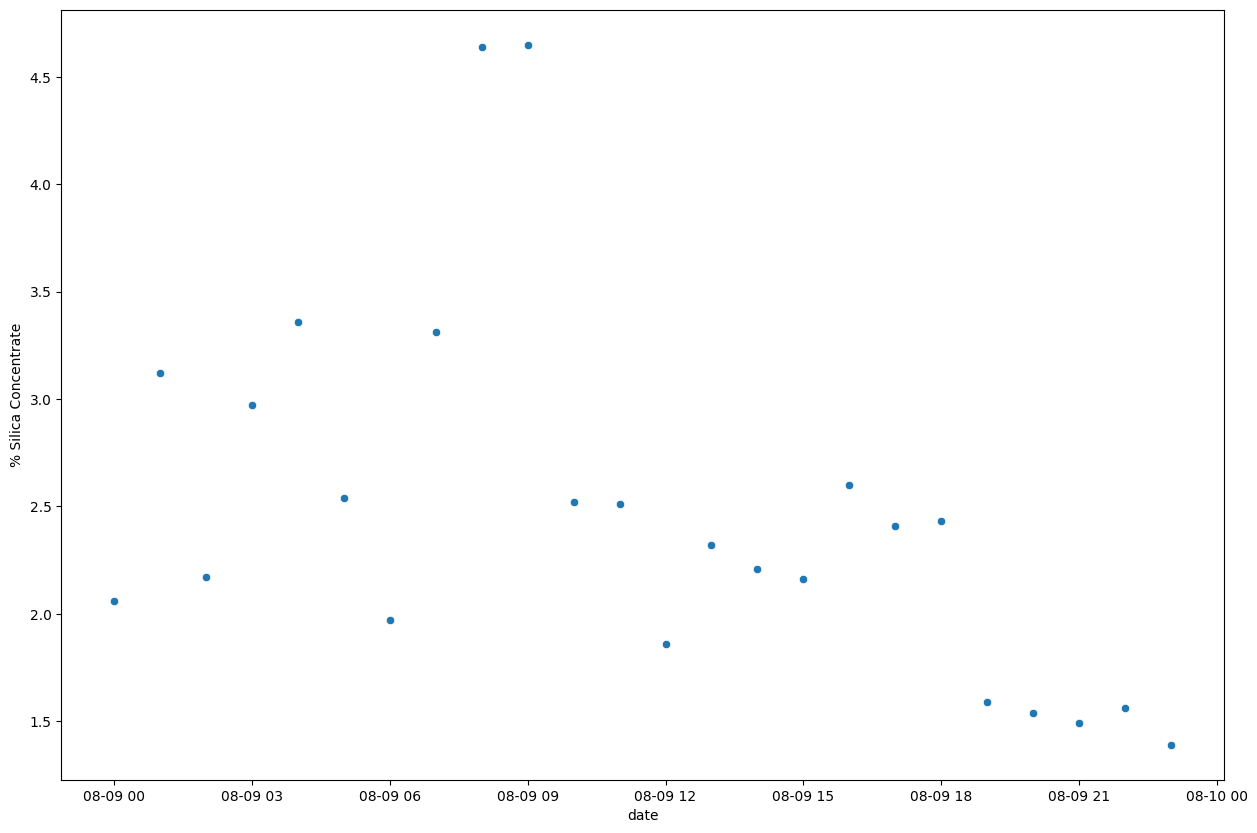

In [ ]:
# Plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df89_resampled, x=df89_resampled.index, y='% Silica Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

In [19]:
df_resampled = df.resample('H').last().round(2).dropna()

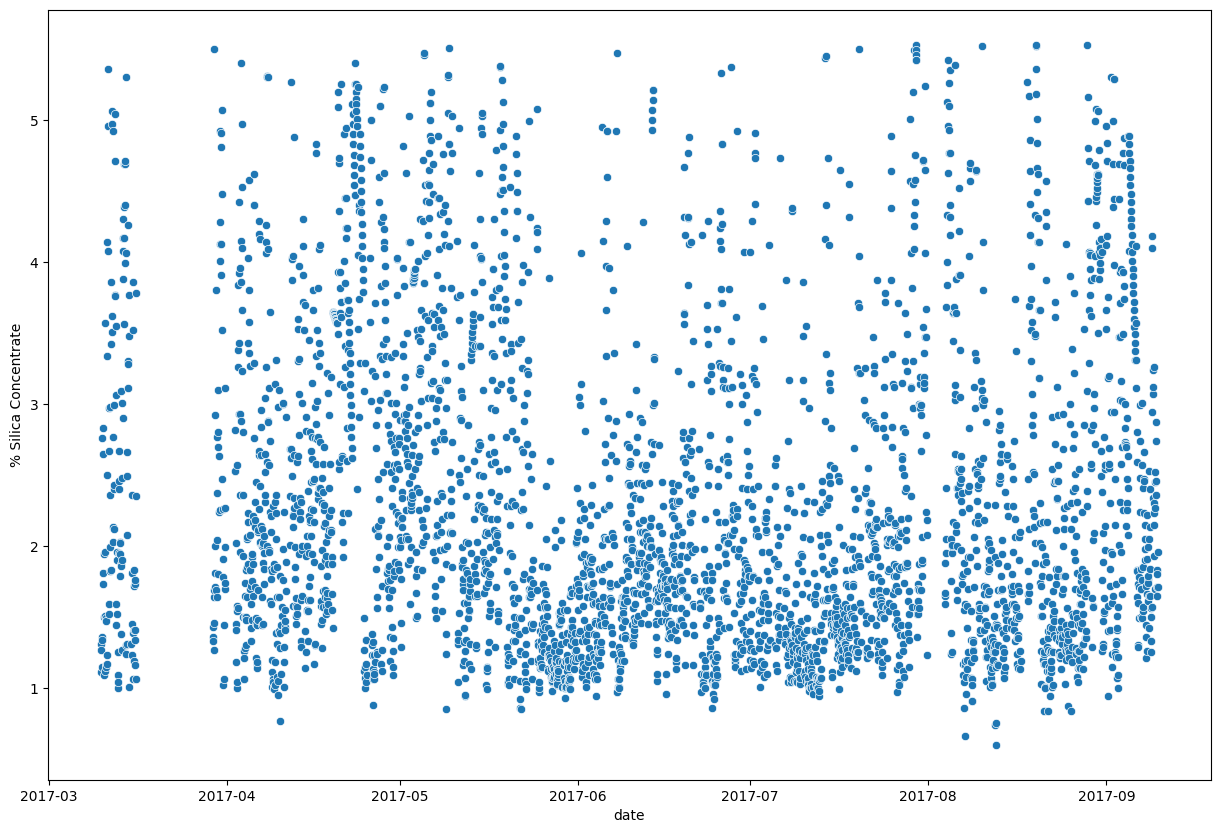

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_resampled, x=df_resampled.index, y='% Silica Concentrate')

plt.ylabel('% Silica Concentrate')
plt.show()

In [24]:
print(f'# de dados removidos no primeiro filtro: {raw_data.shape[0]-df.shape[0]}')
print(f'% de dados removidos no primeiro filtro: {(1-(df.shape[0]/raw_data.shape[0]))*100:.1f}%')
print(f'# de dados removidos: {raw_data.shape[0]-df_resampled.shape[0]}')
print(f'% de dados removidos: {(1-(df_resampled.shape[0]/raw_data.shape[0]))*100:.1f}%')

# de dados removidos no primeiro filtro: 678312
% de dados removidos no primeiro filtro: 92.0%
# de dados removidos: 733802
% de dados removidos: 99.5%


In [21]:
(df_resampled != df_resampled.shift()).sum()

,0
% Iron Feed,306
% Silica Feed,305
Starch Flow,3646
Amina Flow,3646
Ore Pulp Flow,3639
Ore Pulp pH,3481
Ore Pulp Density,3201
Flotation Column 01 Air Flow,3609
Flotation Column 02 Air Flow,3641
Flotation Column 03 Air Flow,3634


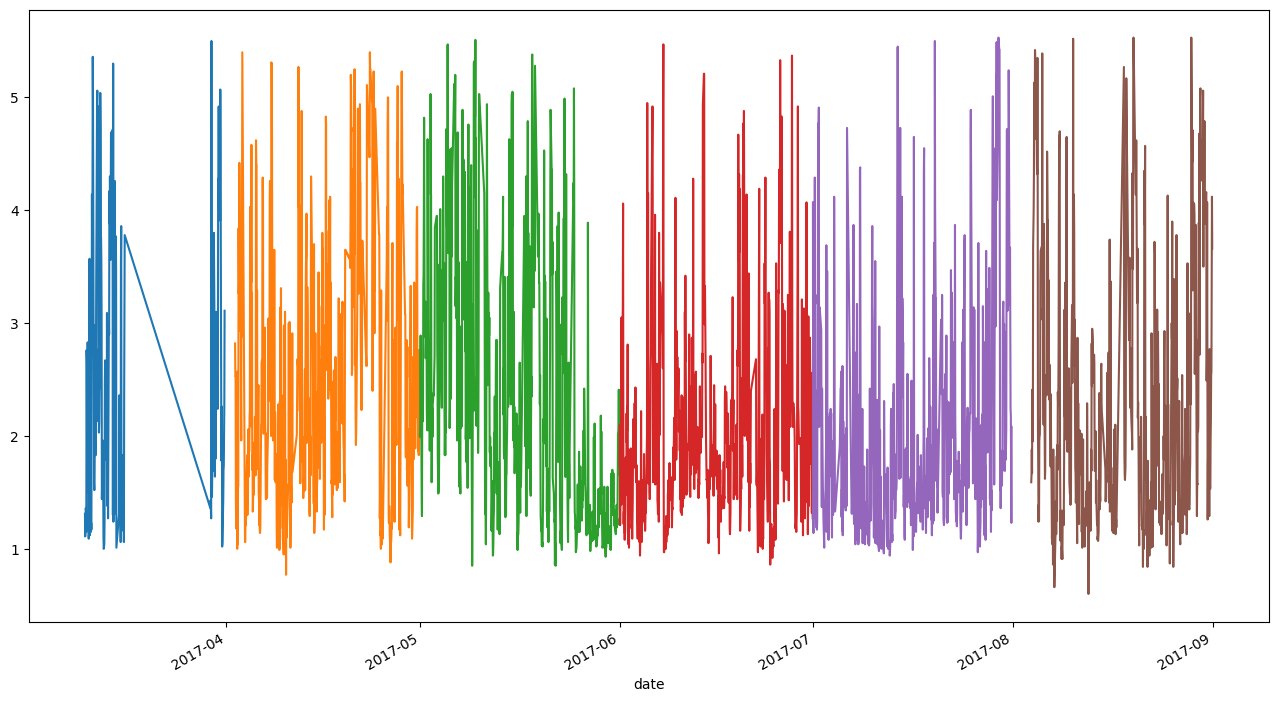

In [ ]:
for month in range(3,9):
  df_resampled['% Silica Concentrate'].loc[df_resampled.index.month == month].plot(figsize= (16,9))

In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3651 non-null   float64
 1   % Silica Feed                 3651 non-null   float64
 2   Starch Flow                   3651 non-null   float64
 3   Amina Flow                    3651 non-null   float64
 4   Ore Pulp Flow                 3651 non-null   float64
 5   Ore Pulp pH                   3651 non-null   float64
 6   Ore Pulp Density              3651 non-null   float64
 7   Flotation Column 01 Air Flow  3651 non-null   float64
 8   Flotation Column 02 Air Flow  3651 non-null   float64
 9   Flotation Column 03 Air Flow  3651 non-null   float64
 10  Flotation Column 04 Air Flow  3651 non-null   float64
 11  Flotation Column 05 Air Flow  3651 non-null   float64
 12  Flotation Column 06 Air Fl

In [ ]:
# Find gaps
gaps = df_resampled.index.to_series().diff()

# Define expected frequency (e.g., 1 hour)
expected_frequency = pd.Timedelta(hours=24)

# Find and print the gaps
gap_locations = gaps[gaps > expected_frequency]
print(gap_locations)

date
2017-03-29 12:00:00   13 days 07:00:00
2017-04-02 08:00:00    1 days 15:00:00
2017-08-03 21:00:00    3 days 01:00:00
2017-08-18 06:00:00    1 days 04:00:00
Name: date, dtype: timedelta64[ns]


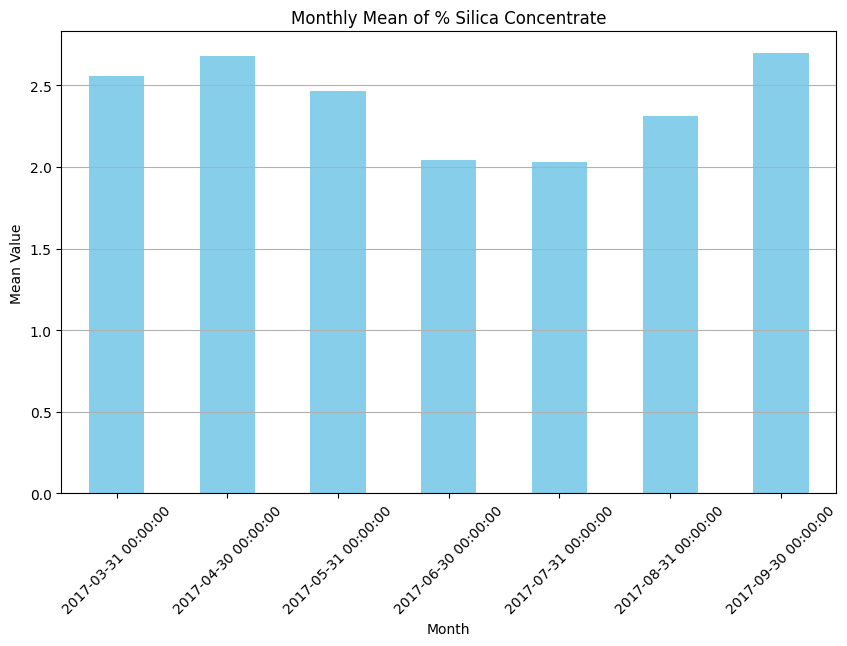

In [ ]:
# Resample to monthly frequency and calculate mean
monthly_mean = df_resampled.resample('M').mean()

# Plot the monthly mean as a bar plot
plt.figure(figsize=(10, 6))
monthly_mean['% Silica Concentrate'].plot(kind='bar', color='skyblue')
plt.title('Monthly Mean of % Silica Concentrate')
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only to the y-axis
plt.show()

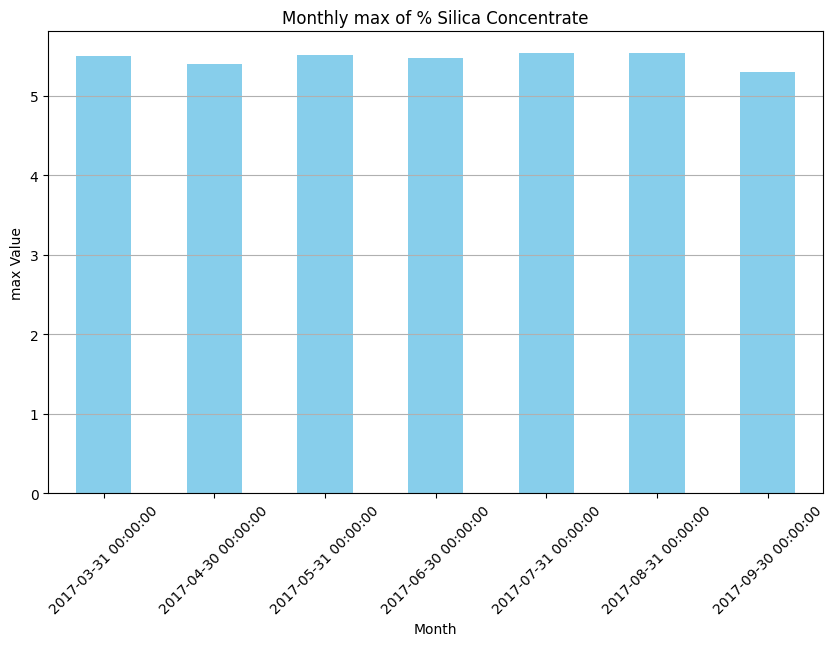

In [ ]:
# Resample to monthly frequency and calculate max
monthly_max = df_resampled.resample('M').max()

# Plot the monthly max as a bar plot
plt.figure(figsize=(10, 6))
monthly_max['% Silica Concentrate'].plot(kind='bar', color='skyblue')
plt.title('Monthly max of % Silica Concentrate')
plt.xlabel('Month')
plt.ylabel('max Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only to the y-axis
plt.show()

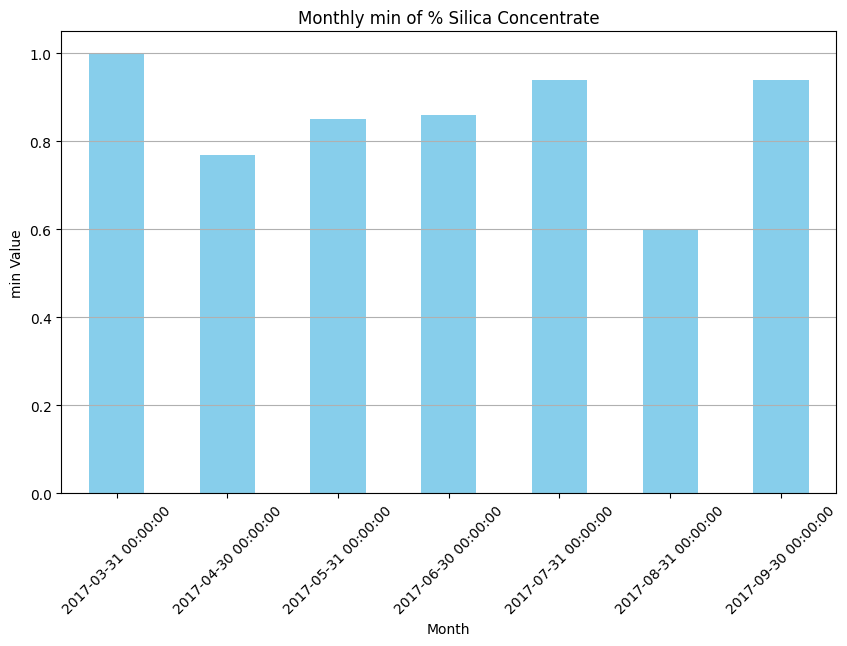

In [ ]:
# Resample to monthly frequency and calculate min
monthly_min = df_resampled.resample('M').min()

# Plot the monthly min as a bar plot
plt.figure(figsize=(10, 6))
monthly_min['% Silica Concentrate'].plot(kind='bar', color='skyblue')
plt.title('Monthly min of % Silica Concentrate')
plt.xlabel('Month')
plt.ylabel('min Value')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only to the y-axis
plt.show()

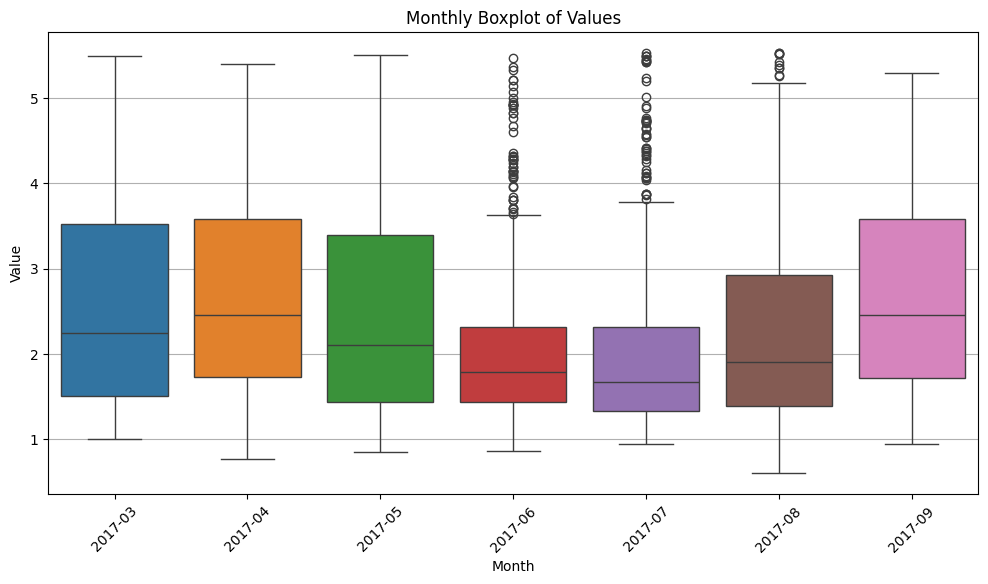

In [ ]:
# Extract month and year for grouping
df_resampled['month'] = df_resampled.index.to_period('M')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='% Silica Concentrate', data=df_resampled, hue = 'month', legend=False)
plt.title('Monthly Boxplot of Values')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

<Axes: >

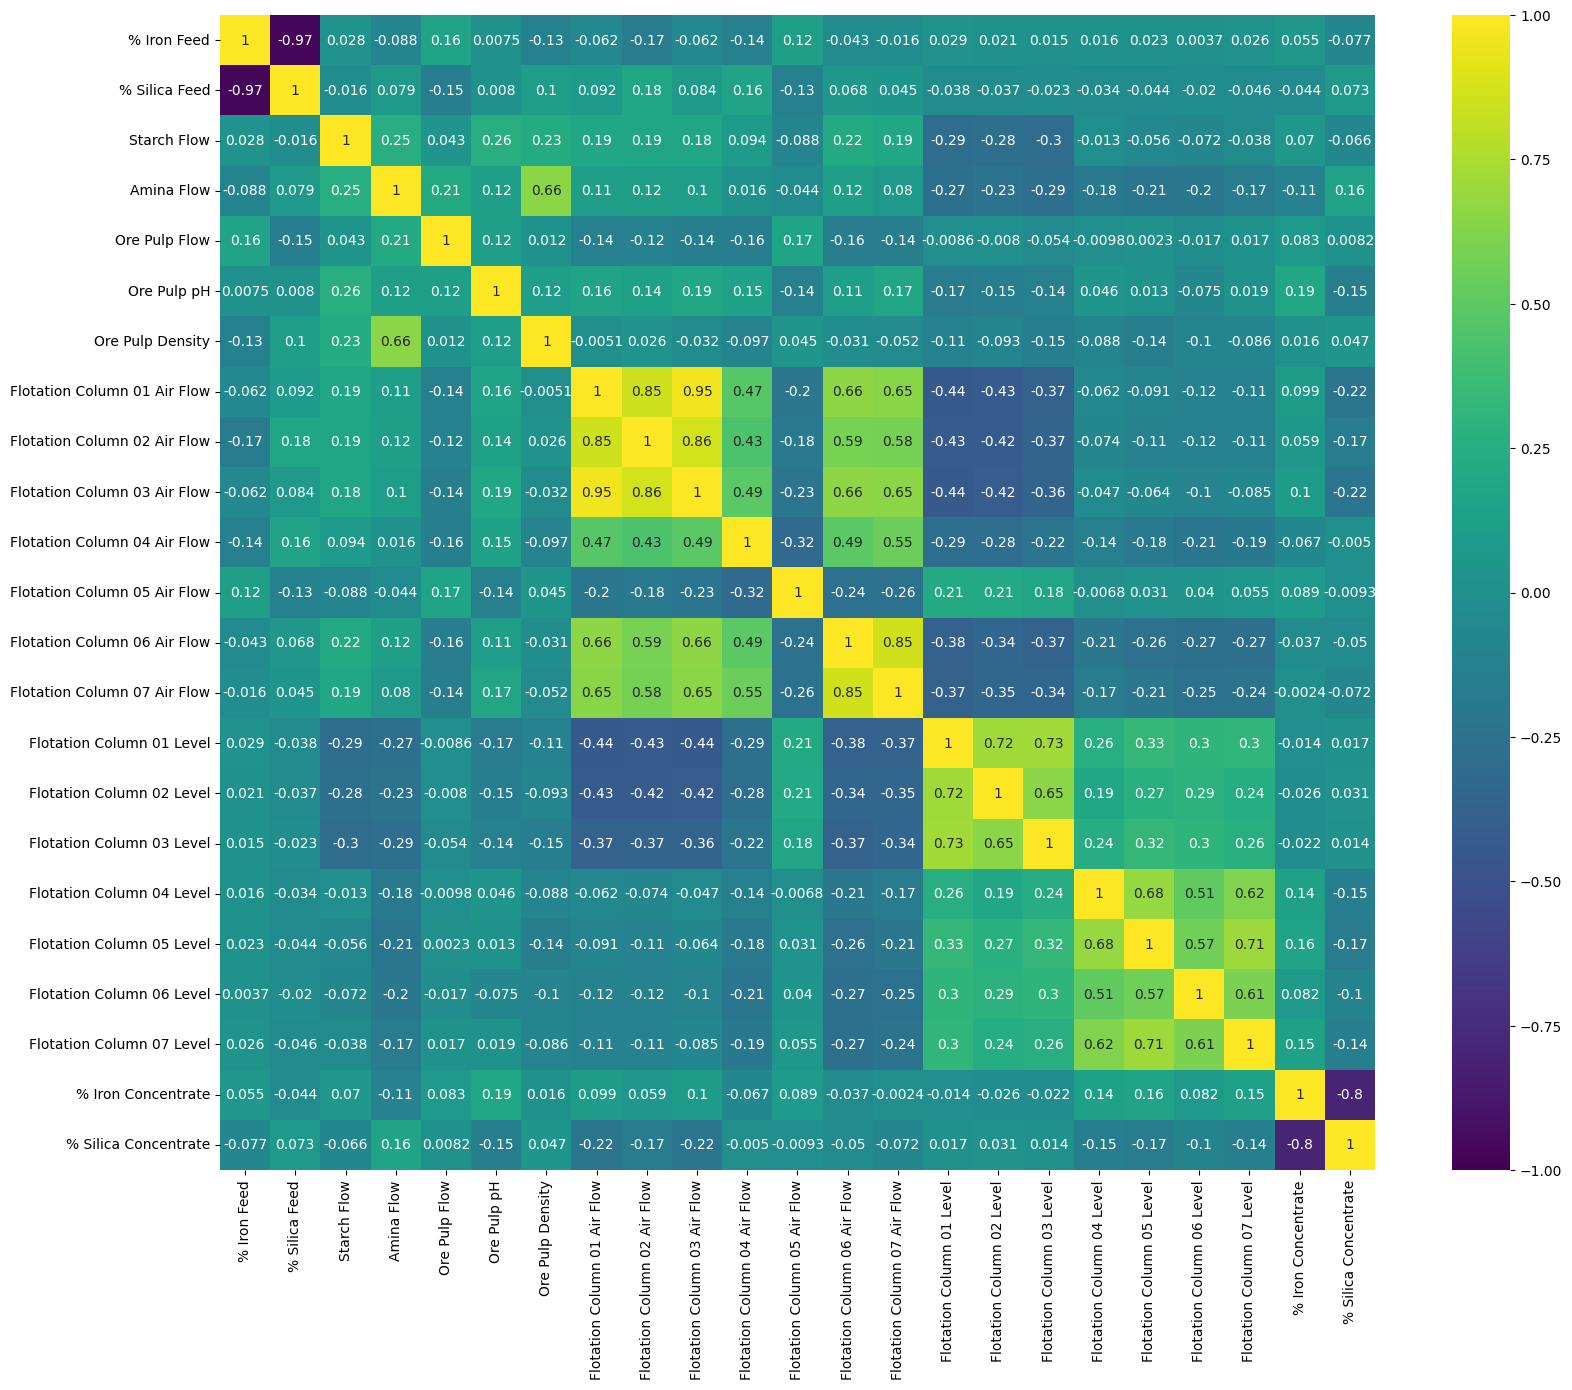

In [ ]:
correlation = raw_data.corr()
fig = plt.subplots(figsize=(20,15))
sns.heatmap(correlation,vmax=1, vmin=-1,square=True,annot=True,cmap='viridis')

<Axes: >

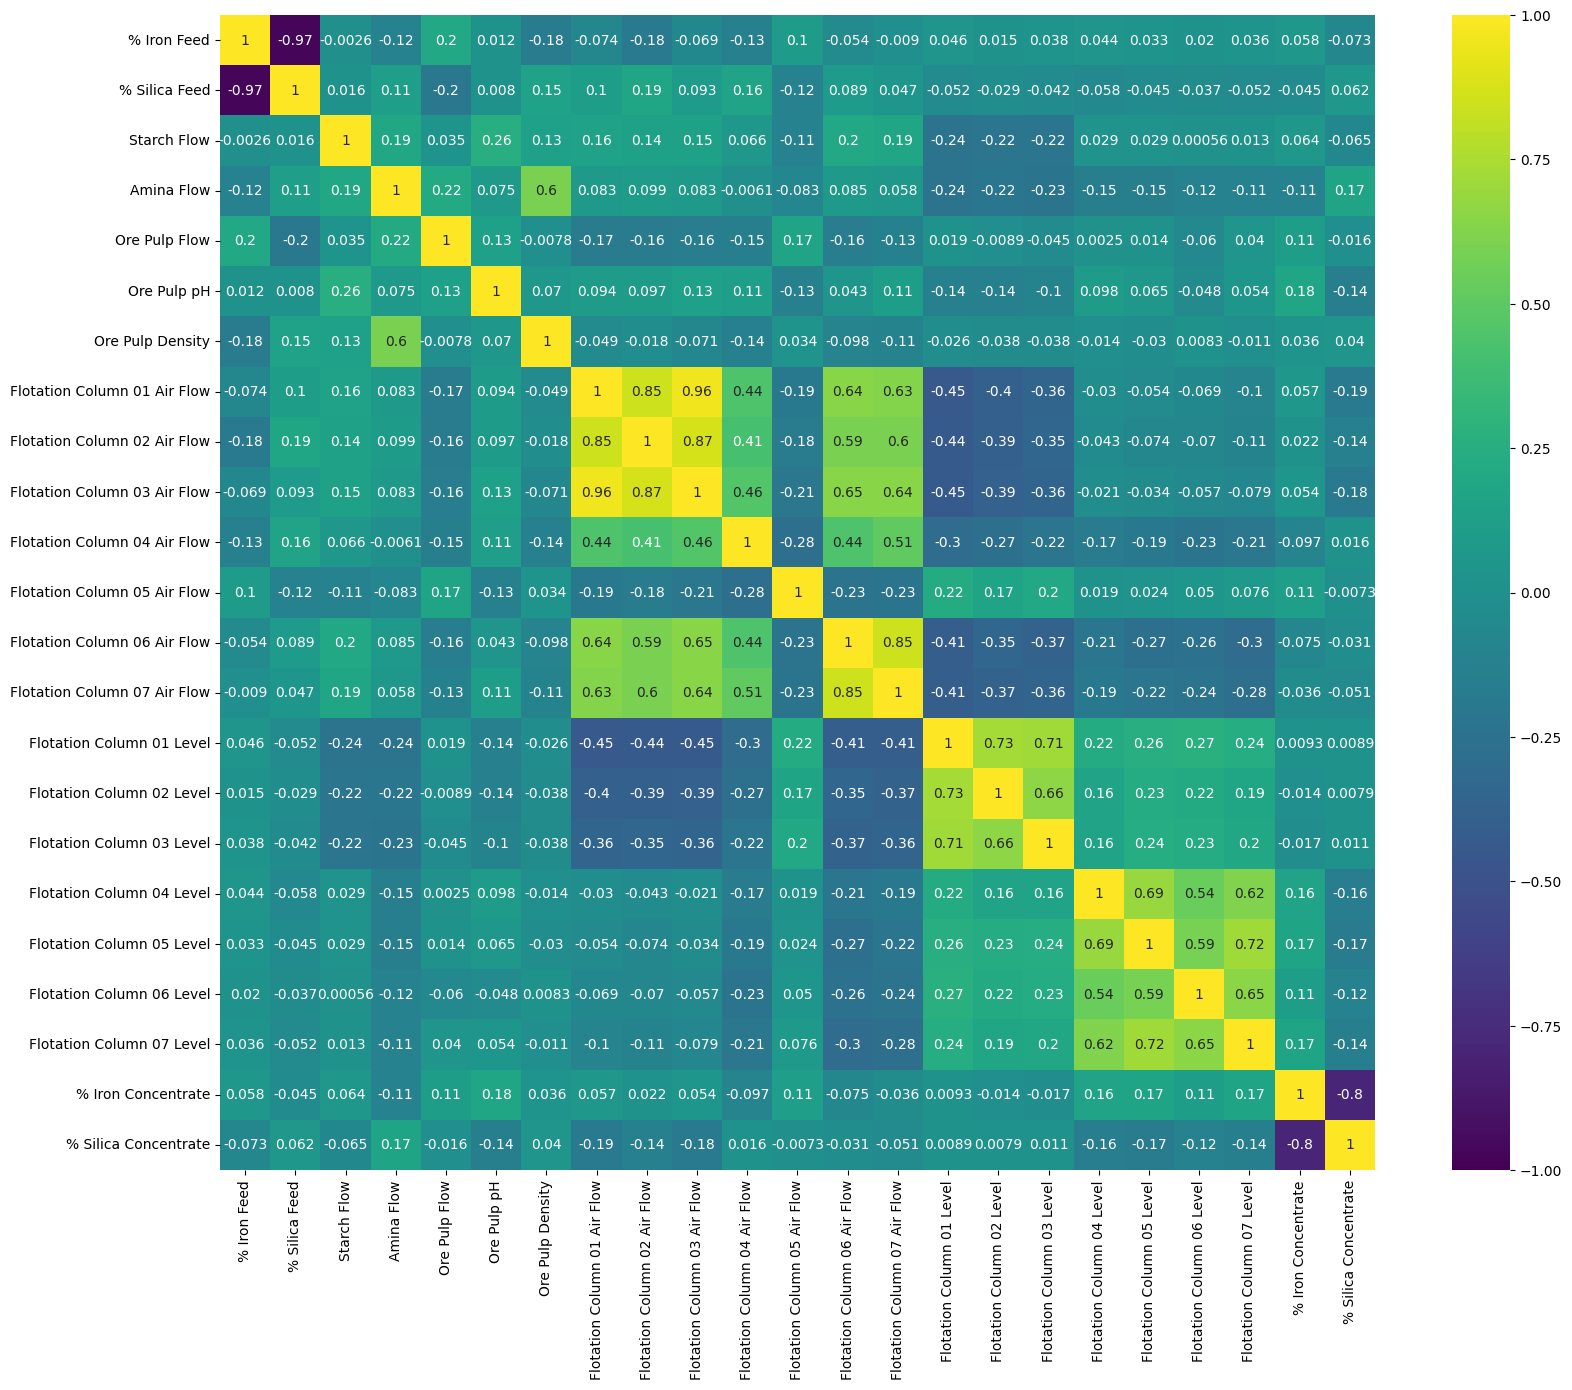

In [ ]:
correlation = df_resampled.drop('month', axis=1).corr()
fig = plt.subplots(figsize=(20,15))
sns.heatmap(correlation,vmax=1, vmin=-1,square=True,annot=True,cmap='viridis')

<Axes: xlabel='date'>

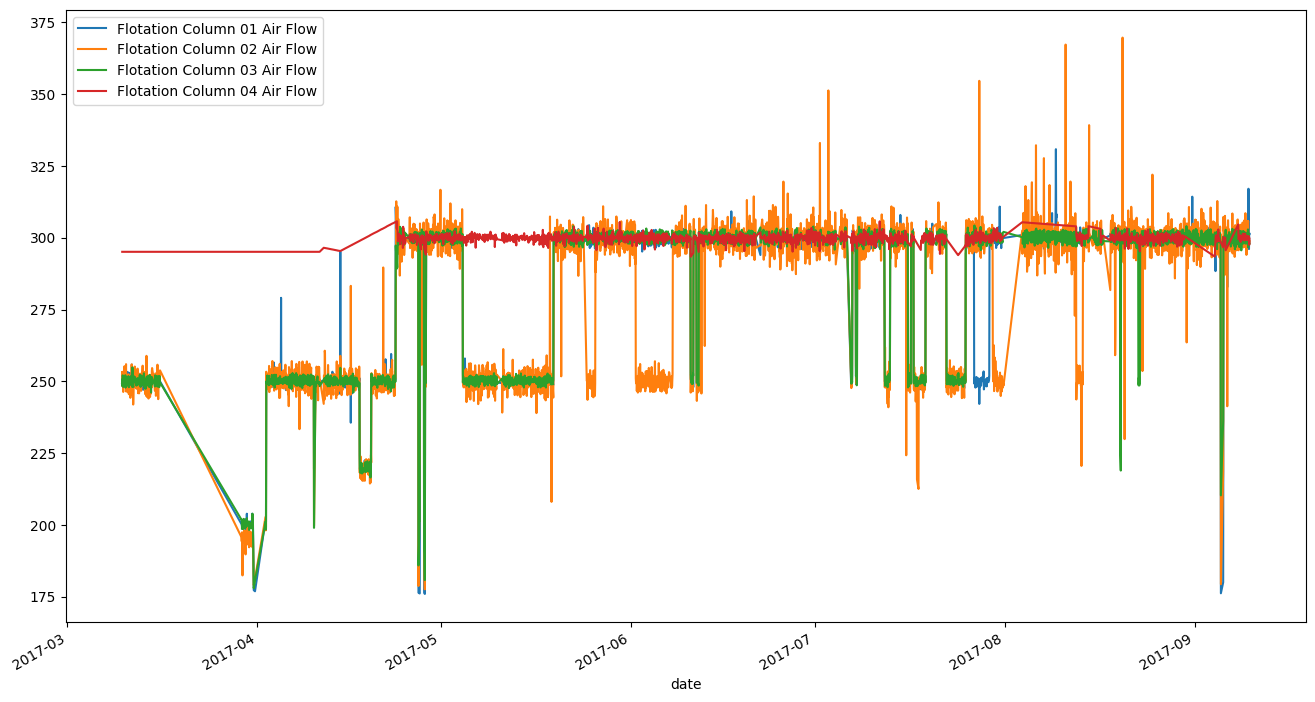

In [22]:
df_resampled[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','Flotation Column 04 Air Flow']].plot(figsize= (16,9))

<Axes: xlabel='date'>

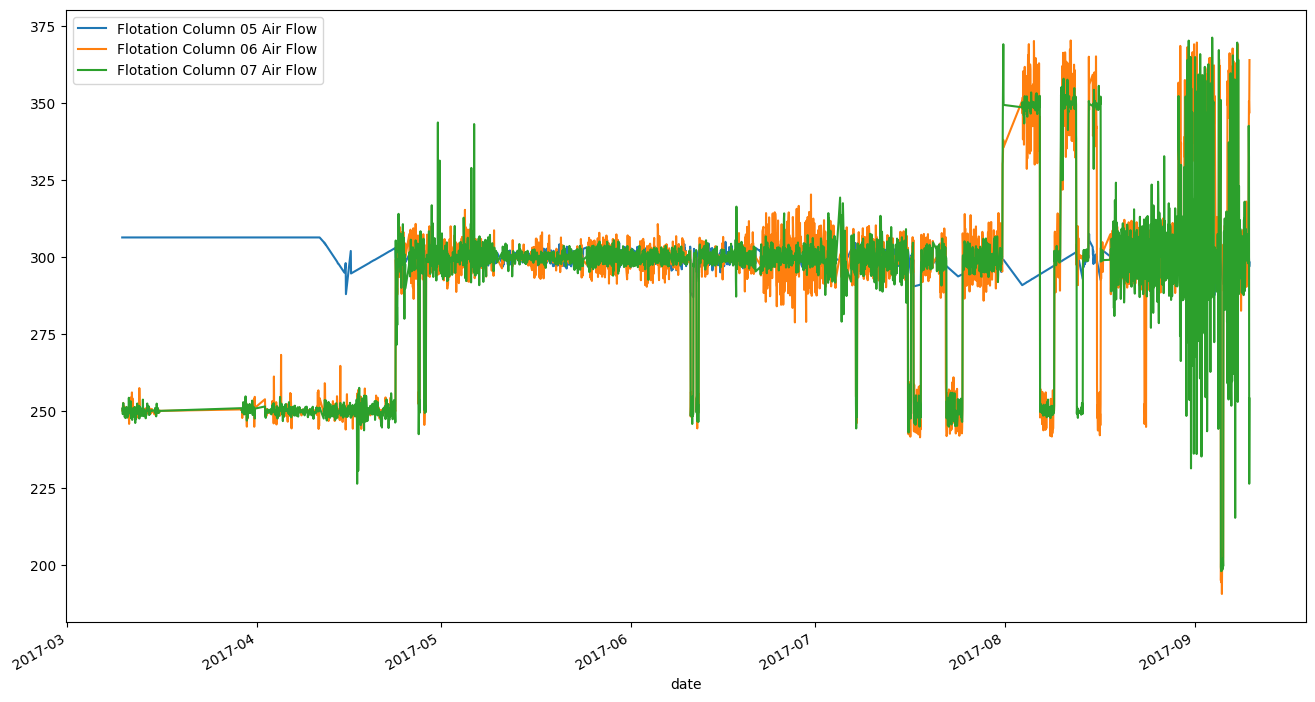

In [23]:
df_resampled[['Flotation Column 05 Air Flow','Flotation Column 06 Air Flow','Flotation Column 07 Air Flow']].plot(figsize= (16,9))

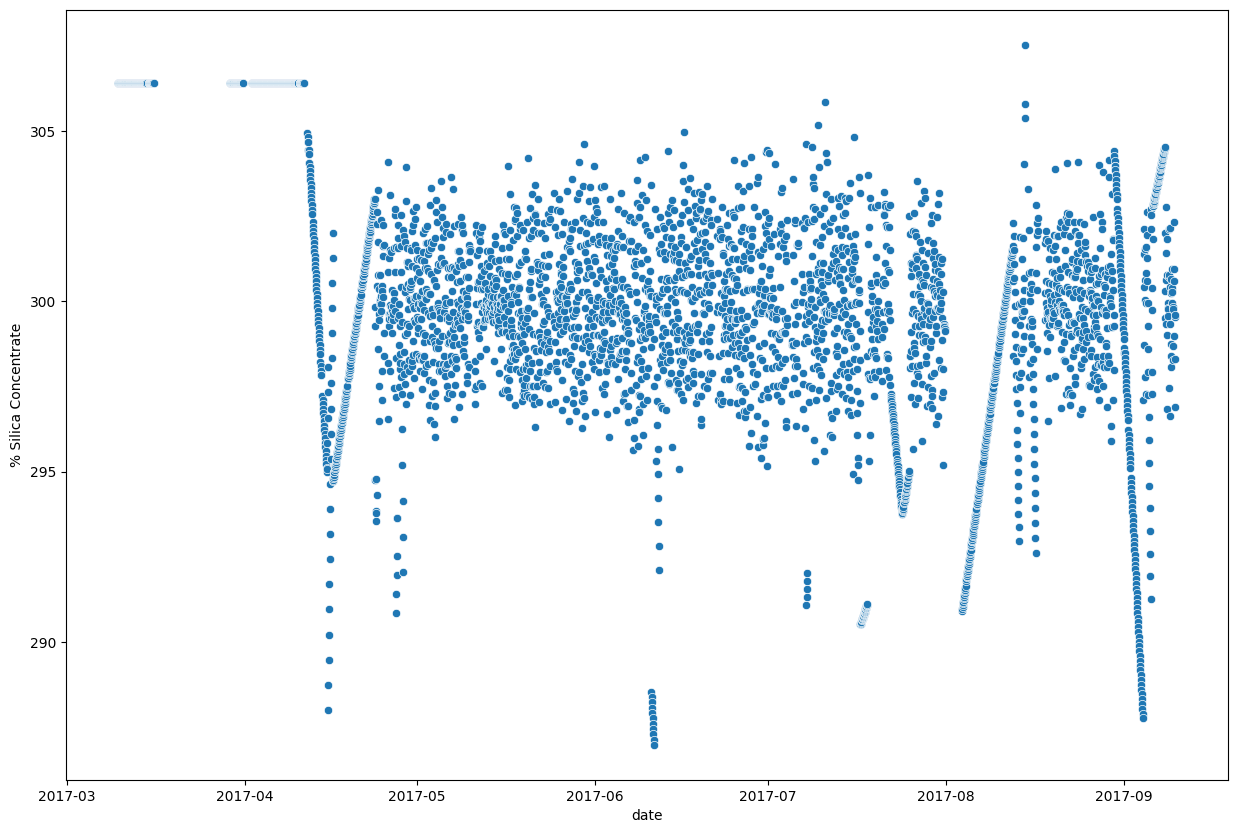

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_resampled, x=df_resampled.index, y='Flotation Column 05 Air Flow')

plt.ylabel('% Silica Concentrate')
plt.show()

In [26]:
air_flow_columns = [col for col in df_resampled.columns if 'Air Flow' in col]
air_flow_df = df_resampled[air_flow_columns]
air_flow_df.describe()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000
mean,281.437327,278.986760,282.198283,299.440438,299.961558,292.108943,290.653577
std,27.159584,28.042226,26.491820,2.513766,3.498192,28.323593,27.200547
min,175.970000,177.580000,177.990000,293.400000,286.980000,190.710000,198.100000
25%,250.345000,250.860000,251.005000,298.320000,298.170000,288.350000,272.585000
50%,299.350000,296.500000,298.720000,299.820000,299.870000,299.320000,298.970000
75%,300.150000,300.835000,300.375000,300.580000,301.755000,302.600000,301.685000
max,330.830000,369.680000,304.260000,305.720000,307.530000,370.320000,371.250000
